In [8]:
import pandas as pd
from mplsoccer.pitch import Pitch

In [46]:
team1df = pd.read_csv("./data/team1.csv")
team1df['id'] = range(1, len(team1df) + 1)
team2df = pd.read_csv("./data/team2.csv")
team2df['id'] = range(1, len(team2df) + 1)

stats = pd.read_csv("./data/player_stats.csv")
stats

,1,3,5,7,8,9,10,12,14,15,16,17,21,18,83,125,20
0,30.479997,22.146976,18.086165,22.815879,19.003438,17.693505,23.494402,39.173676,21.881460,31.039582,20.426507,23.212596,17.671027,10.616947,15.623098,26.359239,17.544650
1,6.317173,7.635406,7.837961,7.358039,6.710745,5.814806,6.583050,6.948482,6.721102,11.363845,7.210312,7.462850,9.542543,10.387670,5.940234,9.692266,10.093691
2,5371.873787,5545.543246,6979.523087,1581.659480,6161.249158,2538.004868,4470.798565,5745.570420,5516.365382,4505.378400,3916.342118,3764.883425,445.796807,3.633367,373.341638,86.895488,82.450454


In [39]:
#now we need to find the average locations and counts of the passes
average_locations = team2df.groupby('from_id').agg({'startx':['mean'],'starty':['mean','count']})
average_locations.columns = ['startx','starty','count']

In [40]:
average_locations

,startx,starty,count
from_id,,,
8,18.166985,67.480774,1
10,10.112043,38.459187,1
12,0.822186,60.047794,1
21,17.370436,60.942867,1
125,15.273972,20.669970,1


In [41]:
#now we need to find the number of passes between each player
pass_between = team1df.groupby(['from_id','to_id']).id.count().reset_index()
pass_between.rename({'id':'pass_count'},axis='columns',inplace=True)

In [42]:
pass_between

,from_id,to_id,pass_count
0,3,7,1
1,83,3,1
2,83,109,1
3,83,116,1
4,109,83,1
5,116,83,1


In [43]:
#merge the average location dataframe. We need to merge on the passer first then the recipient
pass_between = pass_between.merge(average_locations, left_on='from_id',right_index=True)
pass_between = pass_between.merge(average_locations, left_on='to_id',right_index=True,suffixes=['', '_end'])

In [44]:
pass_between

,from_id,to_id,pass_count,startx,starty,count,startx_end,starty_end,count_end
from_id,,,,,,,,,


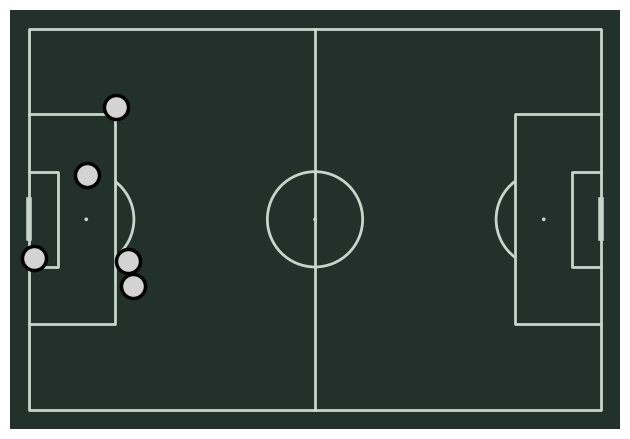

In [45]:
#plot the pitch

pitch = pitch = Pitch(pitch_type='statsbomb',
              pitch_color='#22312b', line_color='#c7d5cc',
          )
fig, ax = pitch.draw()

#plot the arrows

arrows = pitch.arrows(1.2*pass_between.startx,.8*pass_between.starty,1.2*pass_between.startx_end,.8*pass_between.starty_end,
                     width = 5, headwidth = 5, color = 'w', ax = ax, zorder = 1, alpha = .5)

#plot the nodes

nodes = pitch.scatter(1.2*average_locations.startx,.8*average_locations.starty,
                     s = 300, color = '#d3d3d3', edgecolors = 'black', linewidth = 2.5, alpha = 1, zorder = 1, ax=ax)